## Load data

### Import modules

In [17]:
%load_ext autoreload
%autoreload 2

In [18]:
import os

import glob

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sequencing_data import SequencingDataPools
from plasmid_map import Gene
from visualization.histograms import histogram_fitness_draw, histogram_mutation_counts
from visualization.heatmaps import heatmap_draw

pd.options.display.max_columns = 25

In [19]:
project_directory = "/work/greencenter/s426833/DHFR-Mutagenesis-AV/post-selection-unpaired/"
gbk_file = "/work/greencenter/s426833/TEM-1/ref_data/pBR322_AvrII_rc.gbk"
gene_name = "blaTEM-1"

In [20]:
## change to project directory
os.chdir(project_directory)

## set gene
gene = Gene(gbk_file, gene_name)


## Load datasets from project folder

In [28]:
datasets = SequencingDataPools(gene, project_directory, extinct_add=0.001)
print(datasets.samples)
datasets.samples = datasets.treatments
datasets.samples

['TMP_1', 'TMP_2', 'TMP_3', 'UT_1', 'UT_2', 'UT_3', 'V41_1', 'V41_2', 'V41_3']


['TMP', 'UT', 'V41']

In [29]:
example_file = glob.glob("results/mutations/*.pkl")[0]
print(example_file)
display(pd.read_pickle(example_file).head())
display(pd.read_pickle(example_file).tail(5))

results/mutations/TMP_2_all_mutations.pkl


,read_id,ref_pos,ref_base,query_base,base_quality,aa_pos,ref_codon,ref_aa,query_codon,query_aa,query_seq,cds_overlap_length
0,VH00487:5:AAAWJJFM5:1:1107:27661:1189,229,a,C,12,-5,<NA>,<NA>,<NA>,<NA>,GCGCCATTCGATGGTGTCCGGGATCTCGACGCTCTCCCTTATGCGA...,1
1,VH00487:5:AAAWJJFM5:1:1109:35273:41248,234,g,A,34,-4,<NA>,<NA>,<NA>,<NA>,GCGCCATTCGATGGTGTCCGGGATCTCGACGCTCTCCCTTATGCGA...,1
2,VH00487:5:AAAWJJFM5:1:1111:42961:2325,192,a,G,34,-18,<NA>,<NA>,<NA>,<NA>,GCGCCATTCGATGGTGTCCGGGATCTCGACGCTCTCCCTTATGCGA...,1
3,VH00487:5:AAAWJJFM5:1:1201:25578:16335,209,a,T,12,-12,<NA>,<NA>,<NA>,<NA>,GCGCCATTCGATGGTGTCCGGGATCTCGACGCTCTCCCTTATGCGA...,1
4,VH00487:5:AAAWJJFM5:1:1206:43283:24911,209,a,T,12,-12,<NA>,<NA>,<NA>,<NA>,GCGCCATTCGATGGTGTCCGGGATCTCGACGCTCTCCCTTATGCGA...,1


,read_id,ref_pos,ref_base,query_base,base_quality,aa_pos,ref_codon,ref_aa,query_codon,query_aa,query_seq,cds_overlap_length
3630493,VH00487:5:AAAWJJFM5:1:2506:40083:30268,749,a,C,34,168,<NA>,<NA>,<NA>,<NA>,ACAGGCGTCGACAAGCTTGCGTGGCCTAATGCTTAAGTCGAACAGA...,1
3630494,VH00487:5:AAAWJJFM5:1:2511:53622:25554,746,c,G,34,167,<NA>,<NA>,<NA>,<NA>,ACAGGCGTCGACAAGCTTGCGCGGCCTAATGCTTAAGTCGAACAGA...,1
3630495,VH00487:5:AAAWJJFM5:1:2511:53622:25554,749,a,C,34,168,<NA>,<NA>,<NA>,<NA>,ACAGGCGTCGACAAGCTTGCGCGGCCTAATGCTTAAGTCGAACAGA...,1
3630496,VH00487:5:AAAWJJFM5:1:2606:67142:34868,746,c,G,34,167,<NA>,<NA>,<NA>,<NA>,ACAGGCGTCGACAAGCTTGCGCGGCCTAATGCTTAAGTCGAACAGA...,1
3630497,VH00487:5:AAAWJJFM5:1:2606:67142:34868,749,a,C,34,168,<NA>,<NA>,<NA>,<NA>,ACAGGCGTCGACAAGCTTGCGCGGCCTAATGCTTAAGTCGAACAGA...,1


Number of Reads

In [30]:
df_total_reads = pd.DataFrame.from_dict(
    datasets.total_reads, orient="index", columns=["Number of reads"]
).sort_index()

## Read lengths of aligned sequences

In [31]:
df_read_lengths = pd.DataFrame()
for file in glob.iglob("./results/mutations/quality_filtered/seq_lengths/*.pkl"):
    df = pd.read_pickle(file)
    df = pd.melt(df.to_frame(), var_name="sample", value_name="read_length")
    df_read_lengths = pd.concat([df_read_lengths, df])

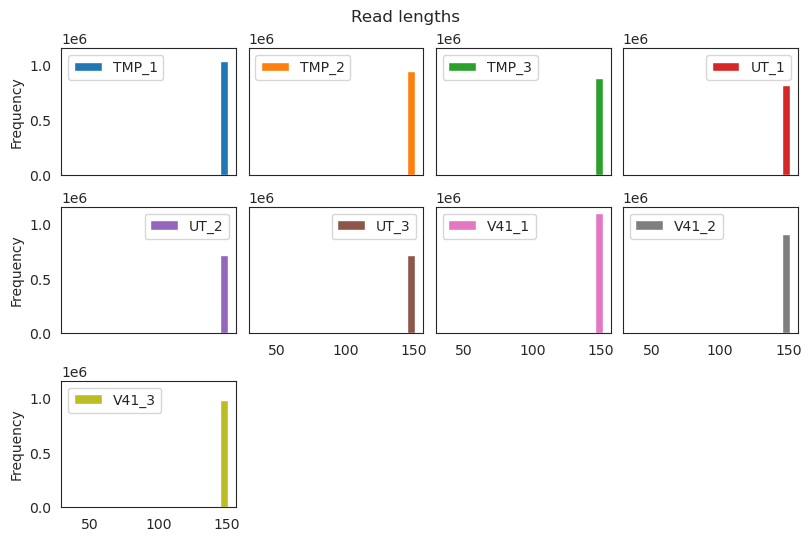

In [32]:
with sns.axes_style("white"):
    df_read_lengths.pivot(columns="sample", values="read_length").plot.hist(
        figsize=(8, 8),
        bins=20,
        subplots=True,
        title="Read lengths",
        layout=(5, 4),
        sharey=True,
        sharex=True,
    )
fig_read_lengths = plt.gcf()
fig_read_lengths.set_layout_engine("constrained")
# plt.savefig("./images/hist_read_lengths.png", bbox_inches="tight", dpi=600)

Summary statistics for read lengths

In [33]:
display(df_read_lengths.groupby("sample").describe().style.format("{:,.3f}"))

## Counts per mutation

### Raw counts heatmap

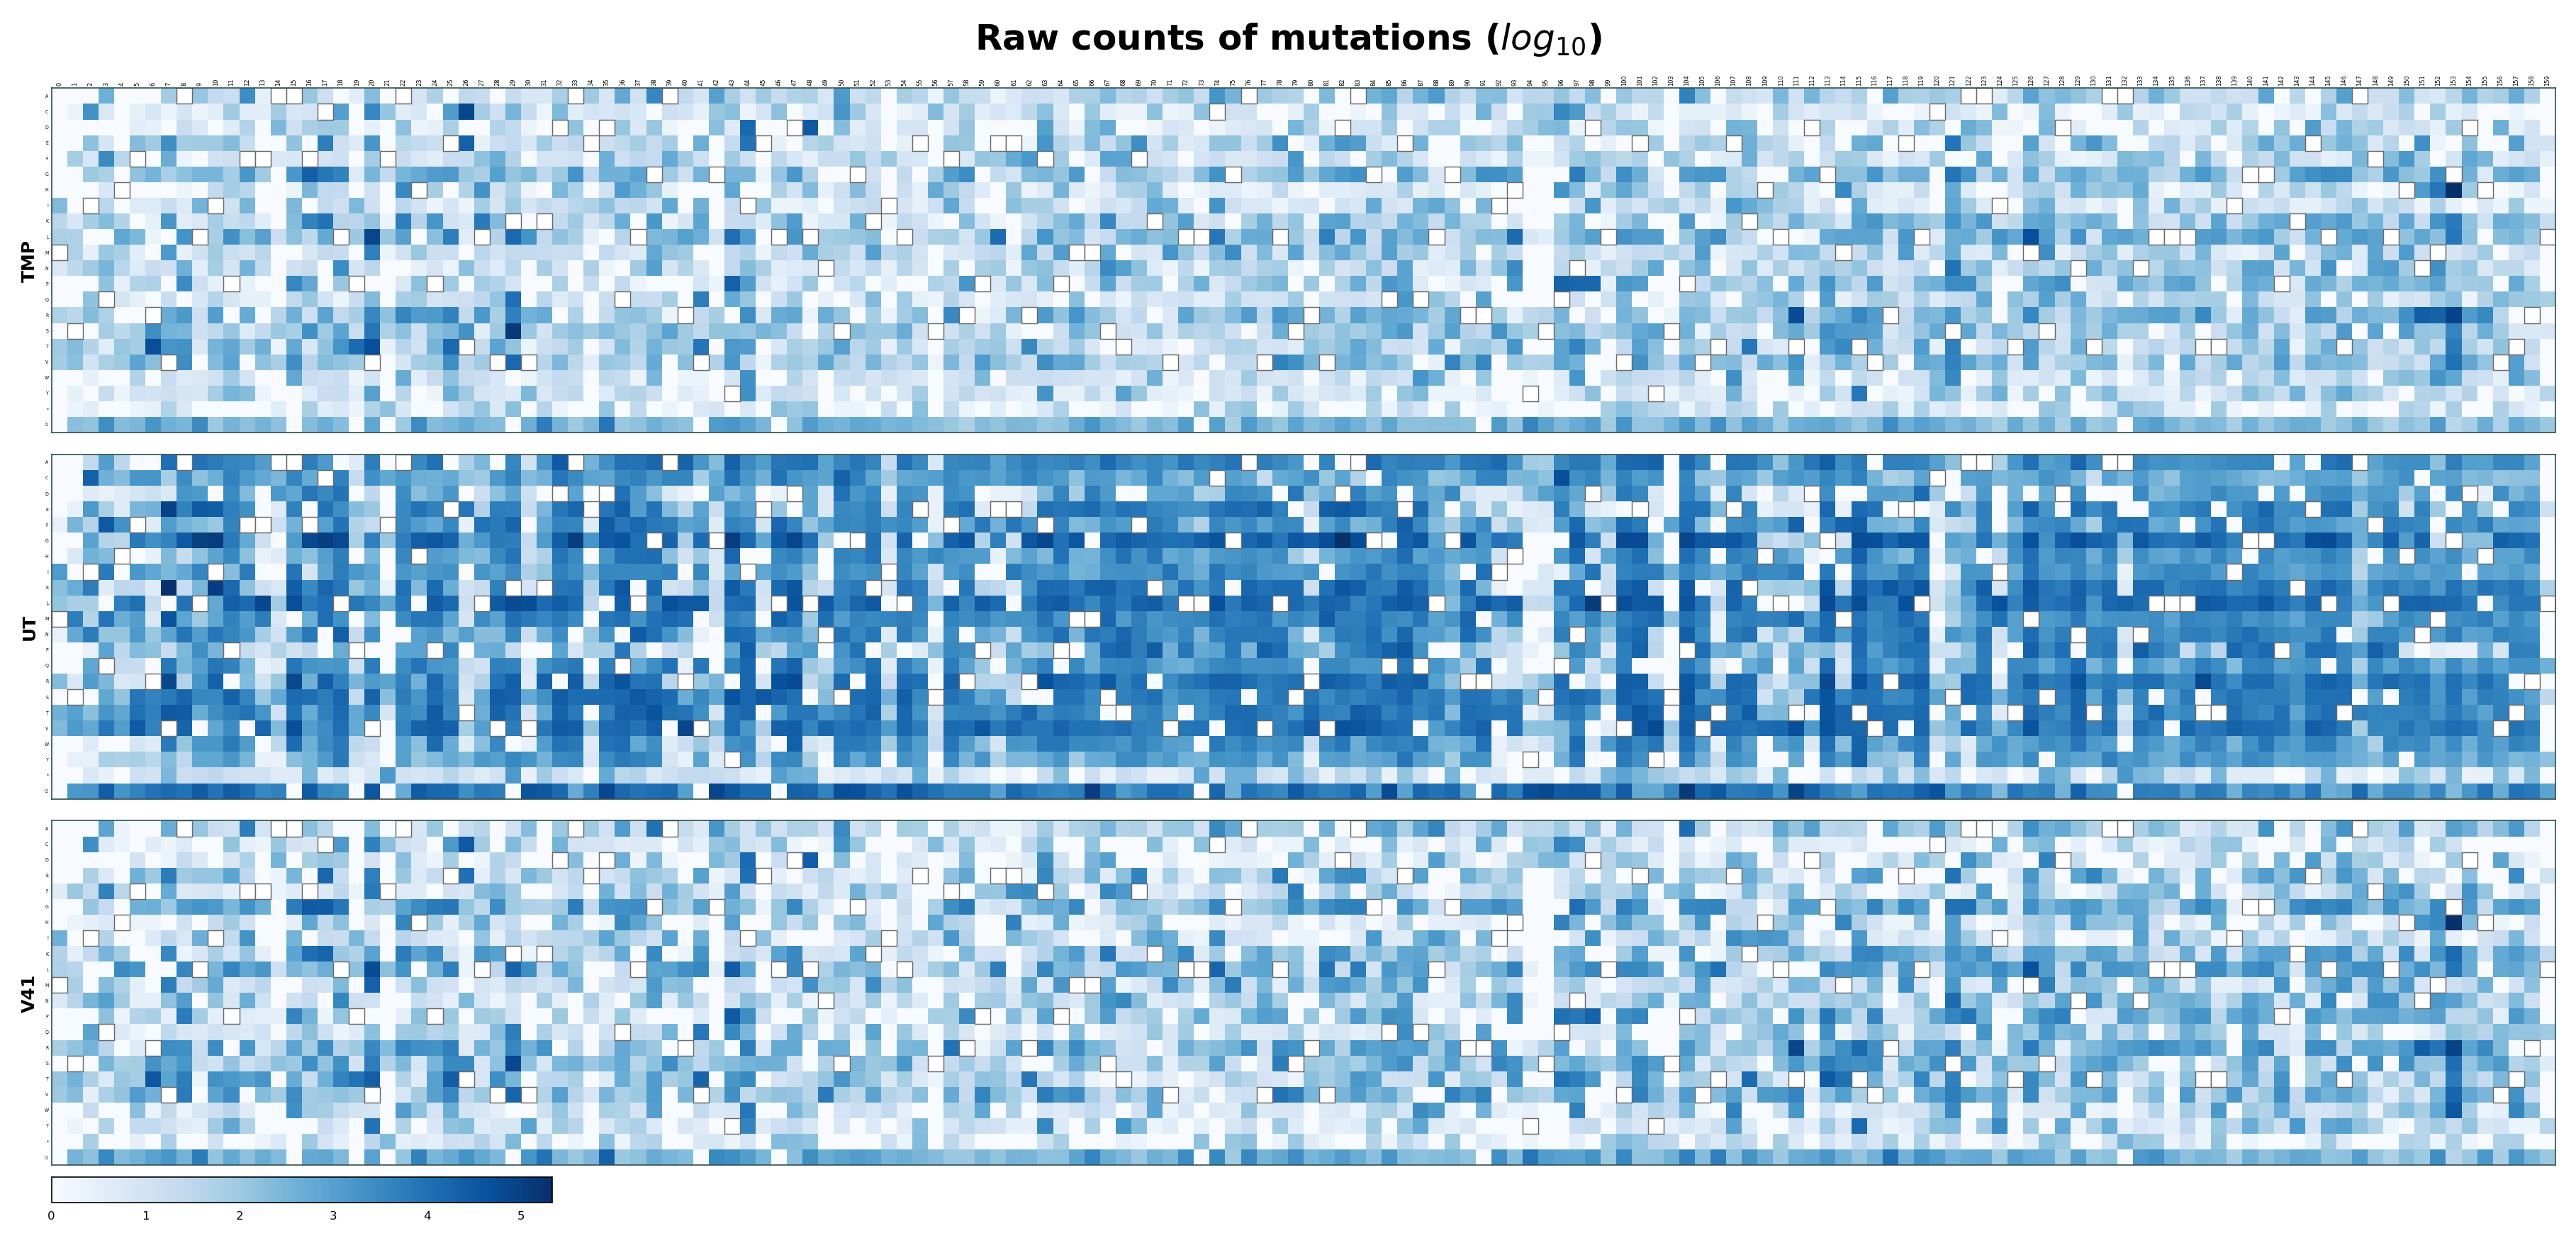

In [27]:
with plt.rc_context({"figure.dpi": 300}):
    fig_heatmap_counts = heatmap_draw(
        datasets, "counts", gene, orientation="horizontal"
    )
# fig_heatmap_counts.savefig(f"./images/heatmap_raw_counts_all.png", bbox_inches="tight", dpi=600)

### $log_{10}(x + 1)$-transformed histogram

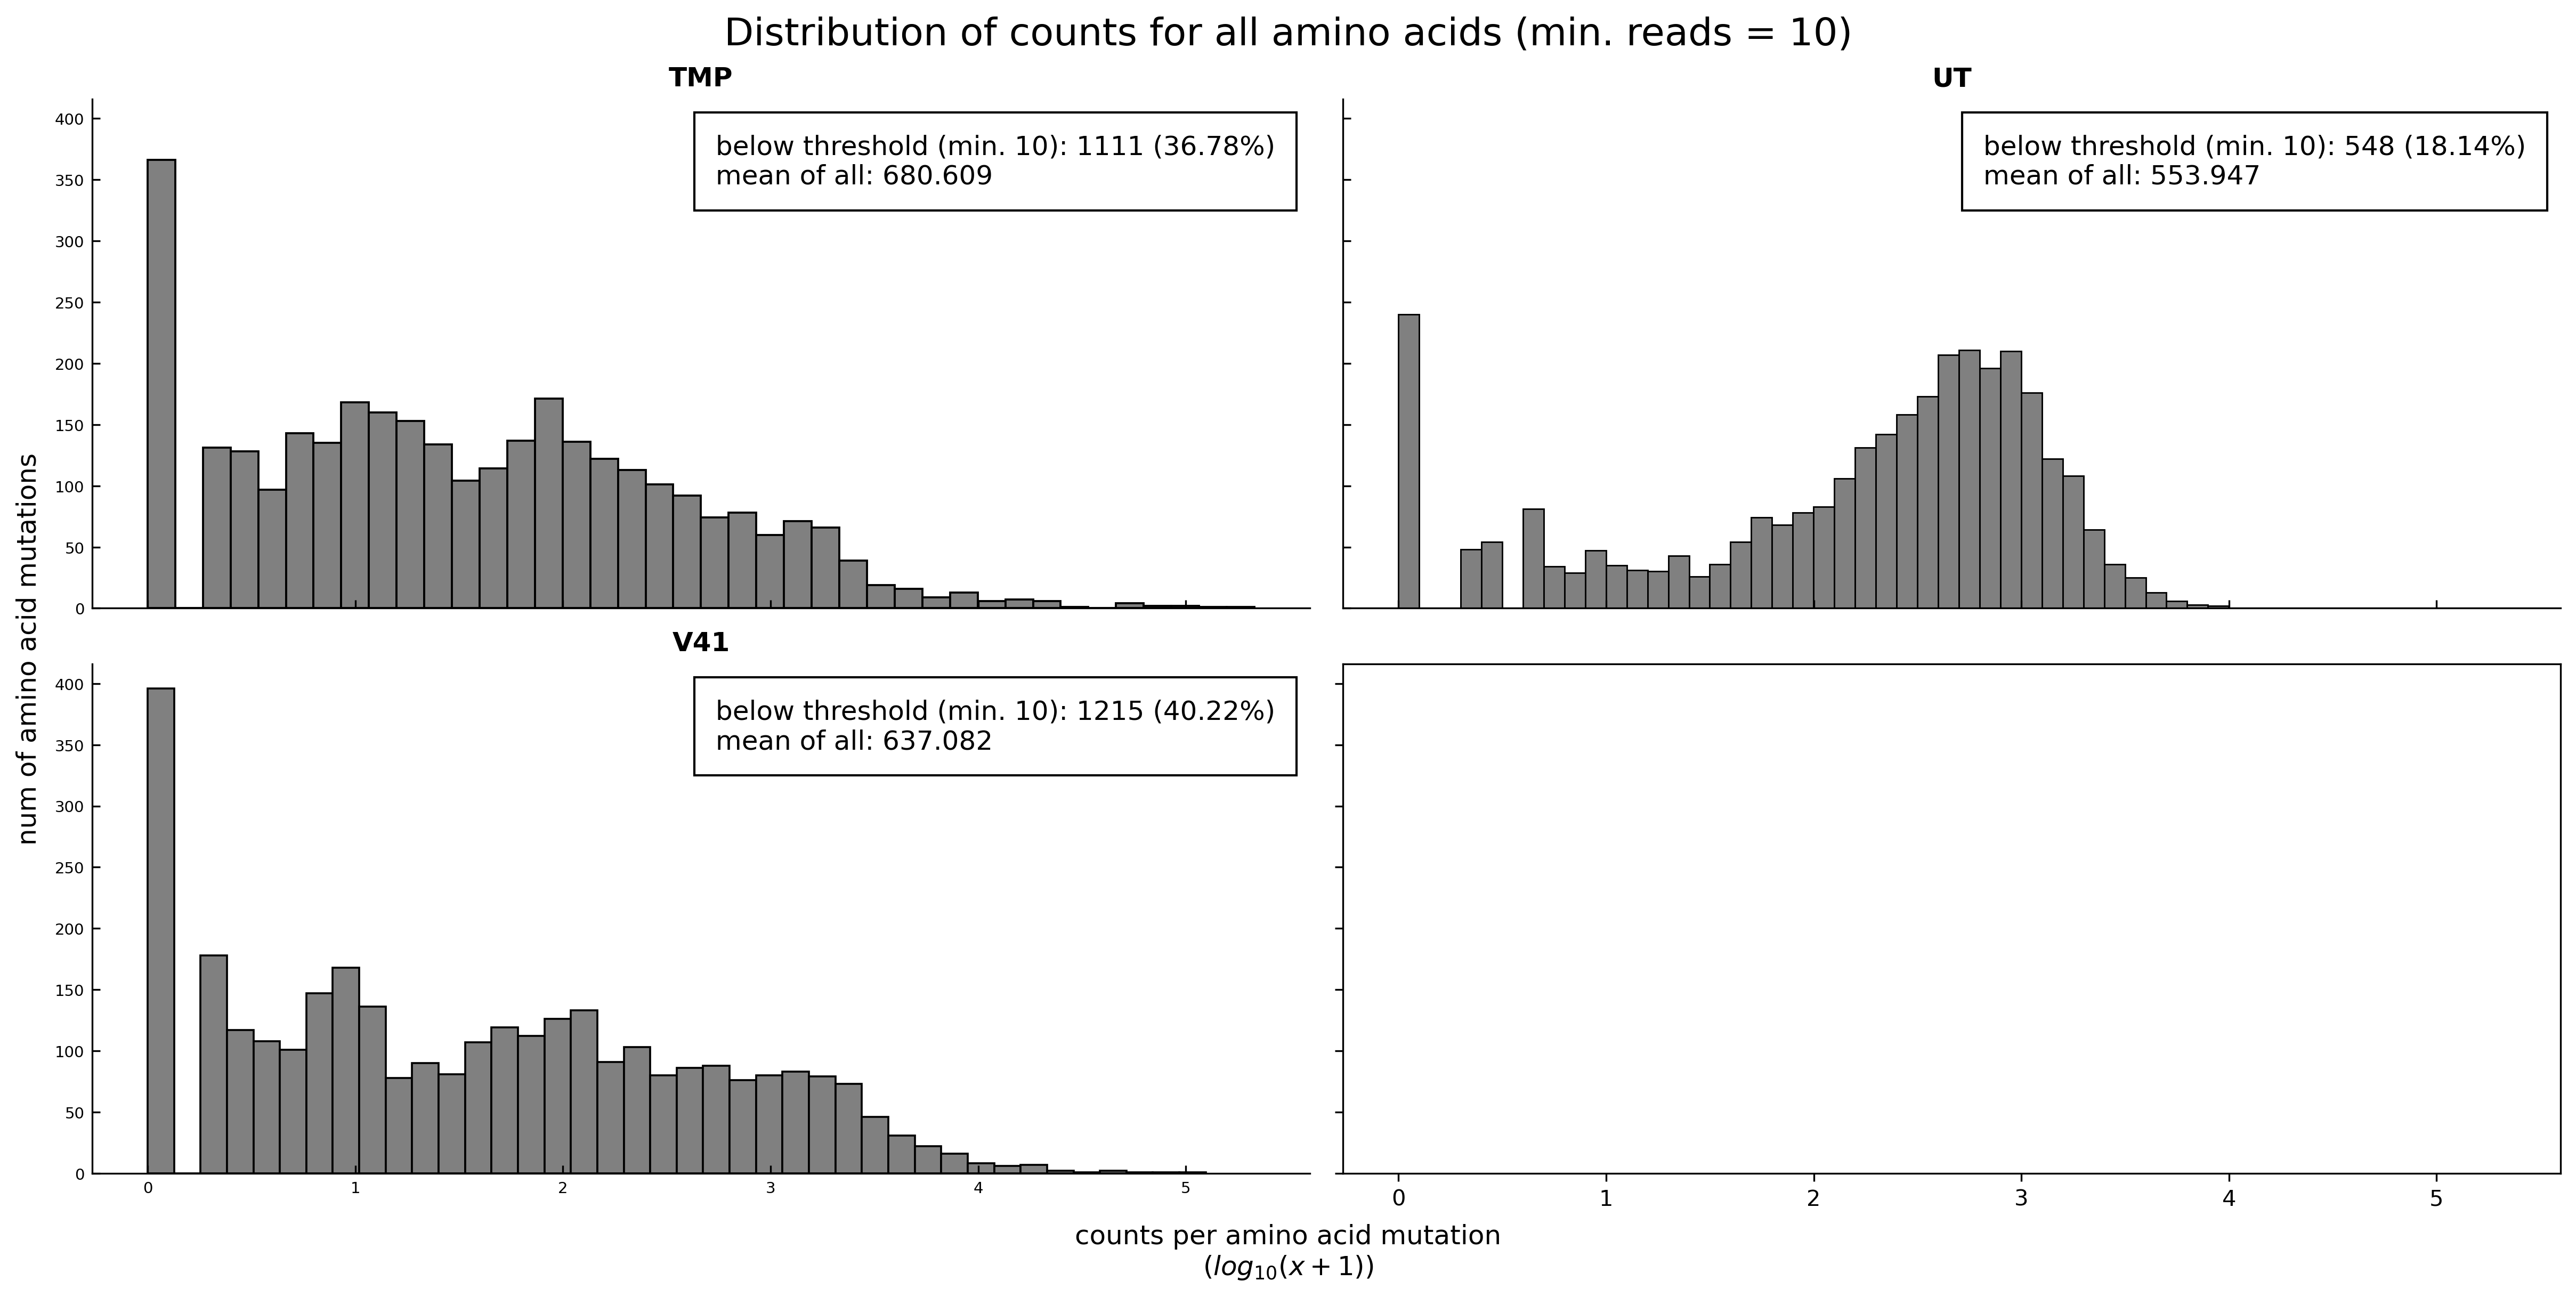

In [45]:
with plt.rc_context({"figure.dpi": 300}):
    fig_mutation_counts = histogram_mutation_counts(datasets, read_threshold=10)
    # plt.yscale("log")

## Fitness effects

| | |
|-|-|
| $F_i = e_i - <e_{WT}>$ | where $F$ is relative fitness, $e$ is enrichment |
| $e_i = \log_{10}(\frac{f_i^{sel}}{f_i^{unsel}})$ | where $f$ is frequency |
| $f_i = \frac{N_i}{N_{total}}$ | where $N$ is observations |

### Heatmaps

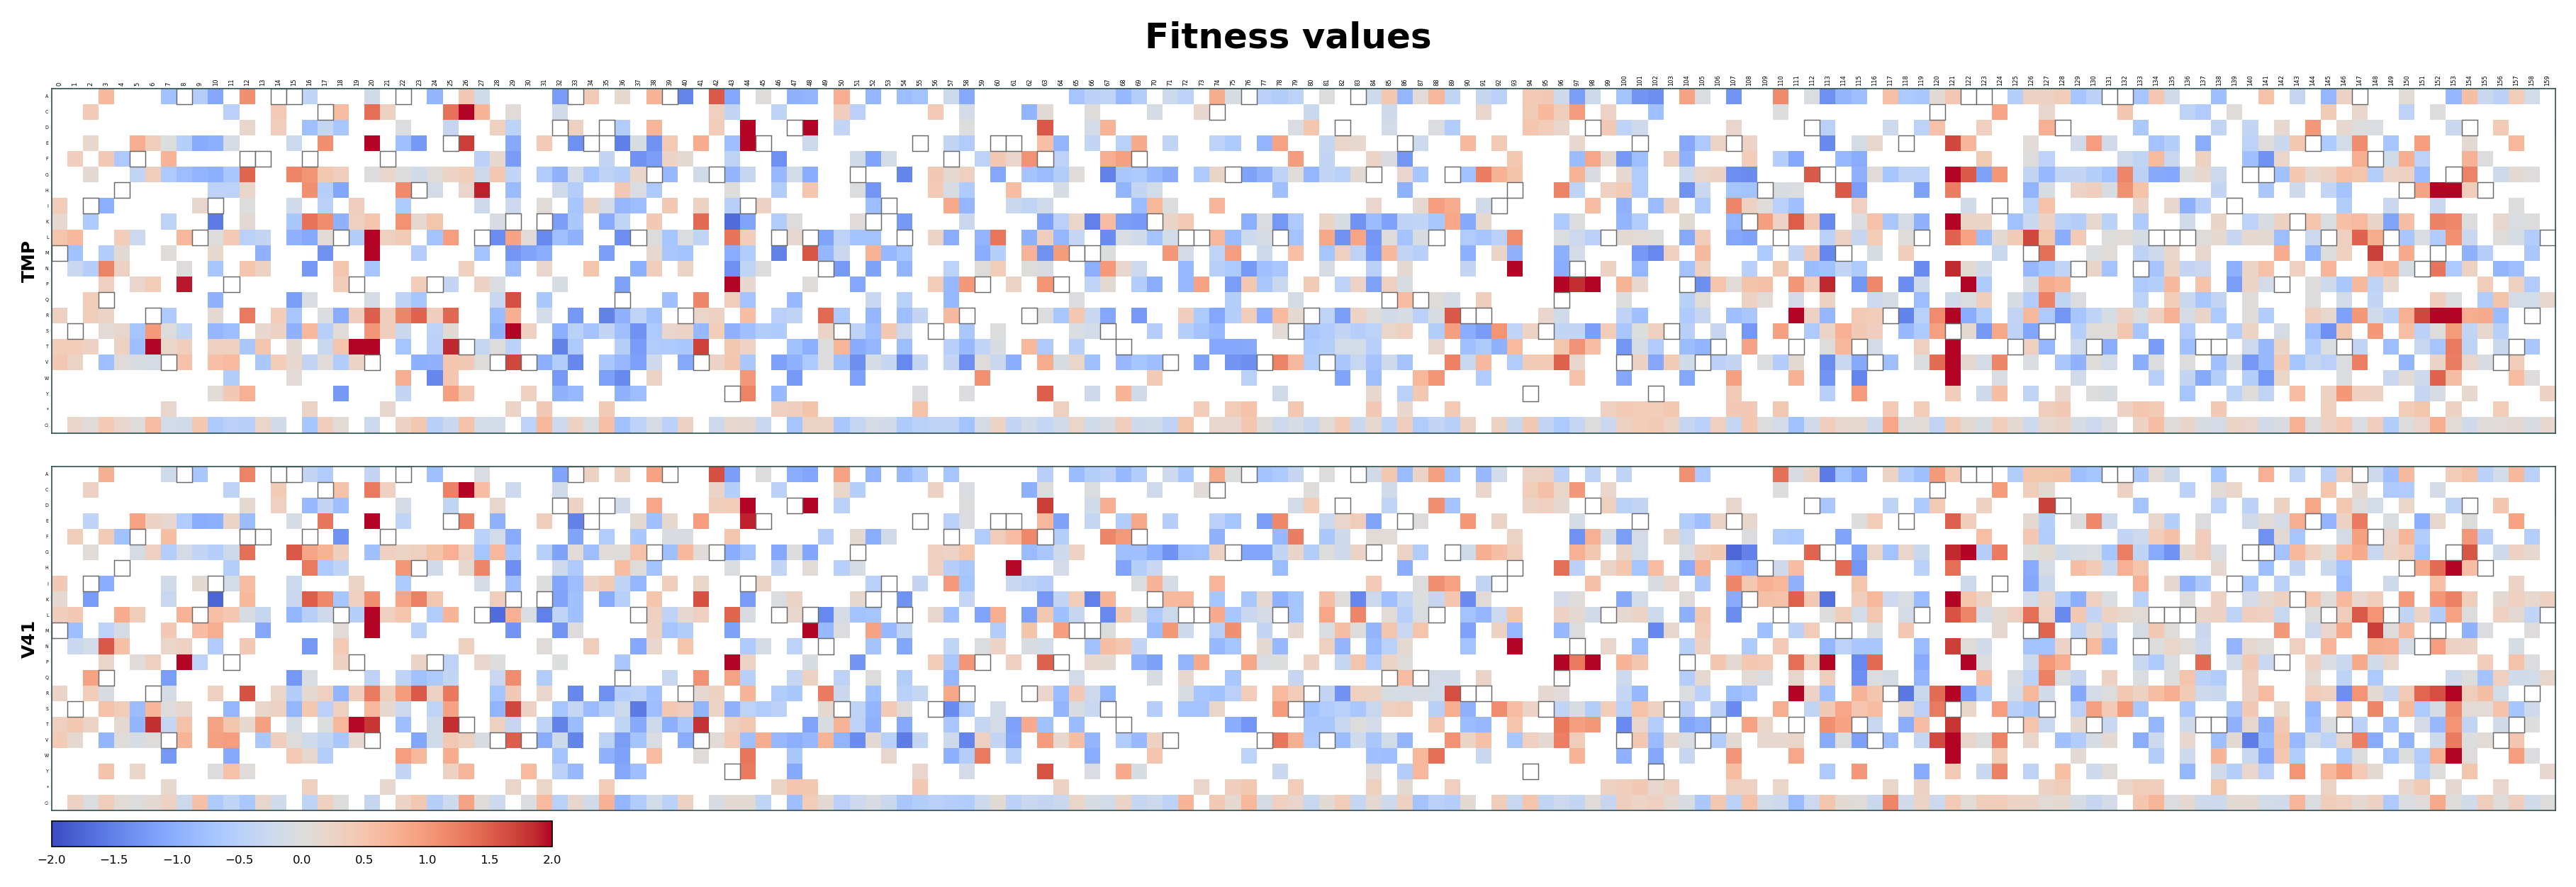

In [53]:
with plt.rc_context({"figure.dpi": 300}):
    fig_heatmap_fitness = heatmap_draw(
        datasets,
        "fitness",
        gene,
        fitness_cmap="coolwarm",
        orientation="horizontal",
        read_threshold=20,
    )

# fig_heatmap_counts.savefig(f"./images/heatmap_raw_counts_all.png", bbox_inches="tight", dpi=600)
# fig_heatmap_fitness.axes[0].set_xlim(left=23)


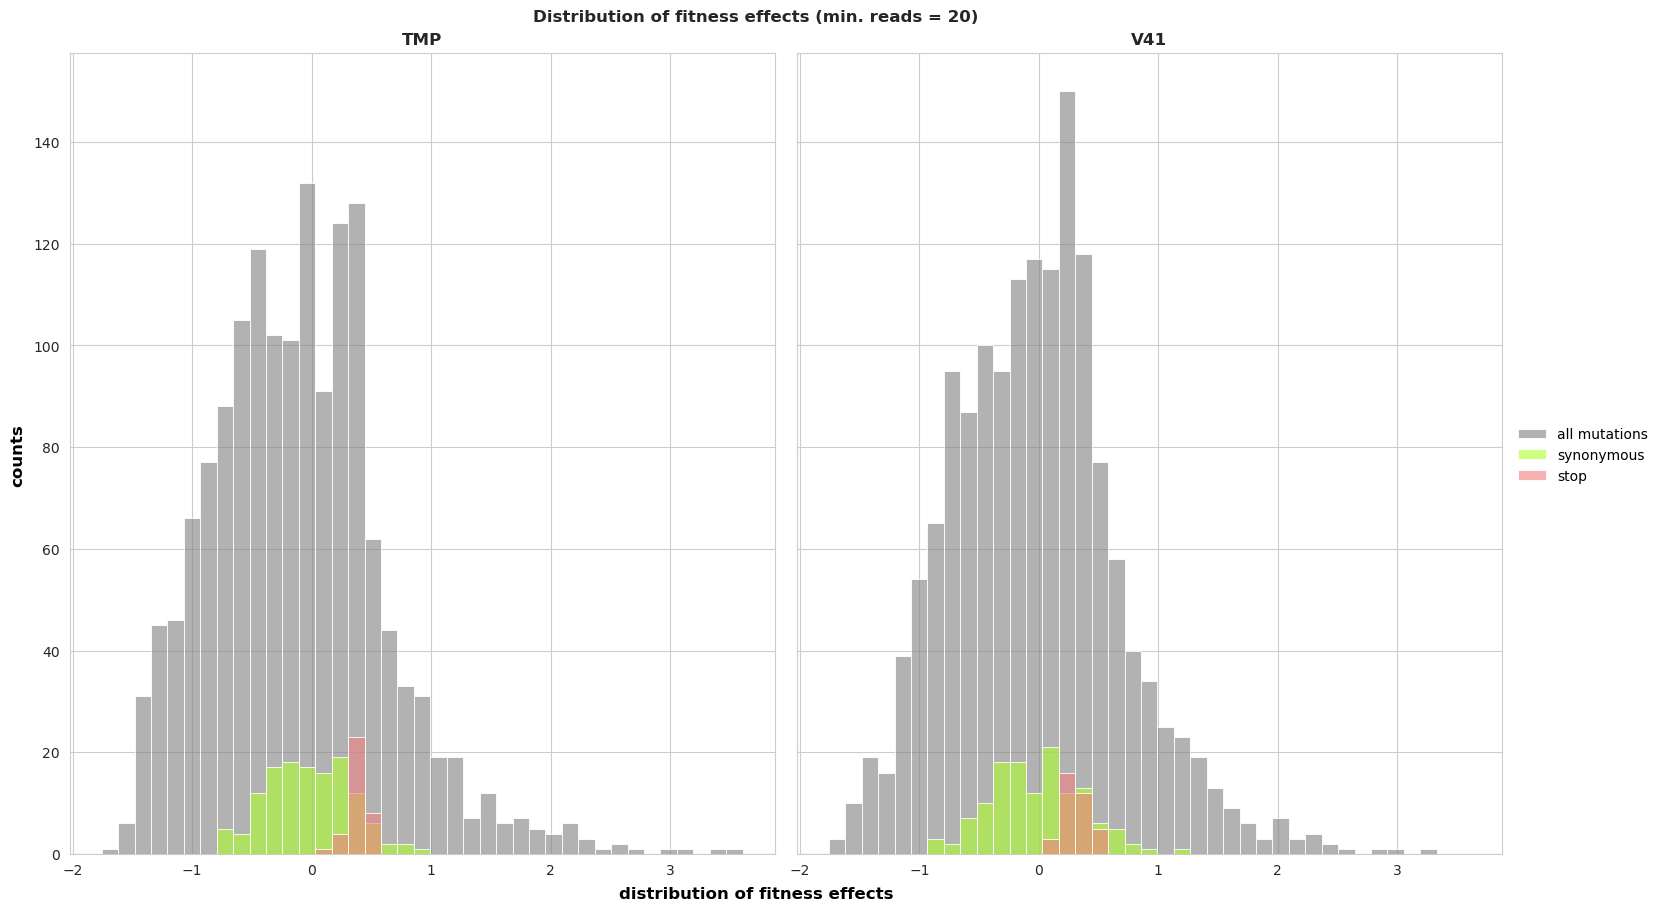

In [54]:
read_threshold = 20

fig_hist_dfe = histogram_fitness_draw(
    datasets, read_threshold=read_threshold
)
fig_hist_dfe.set_size_inches(15, 9)
# fig_hist_dfe_thresh_20.axes[-1].set_xlim(left=-1, right=1)
# fig_hist_dfe_thresh_20.axes[-1].set_ylim(top=100)
plt.show()

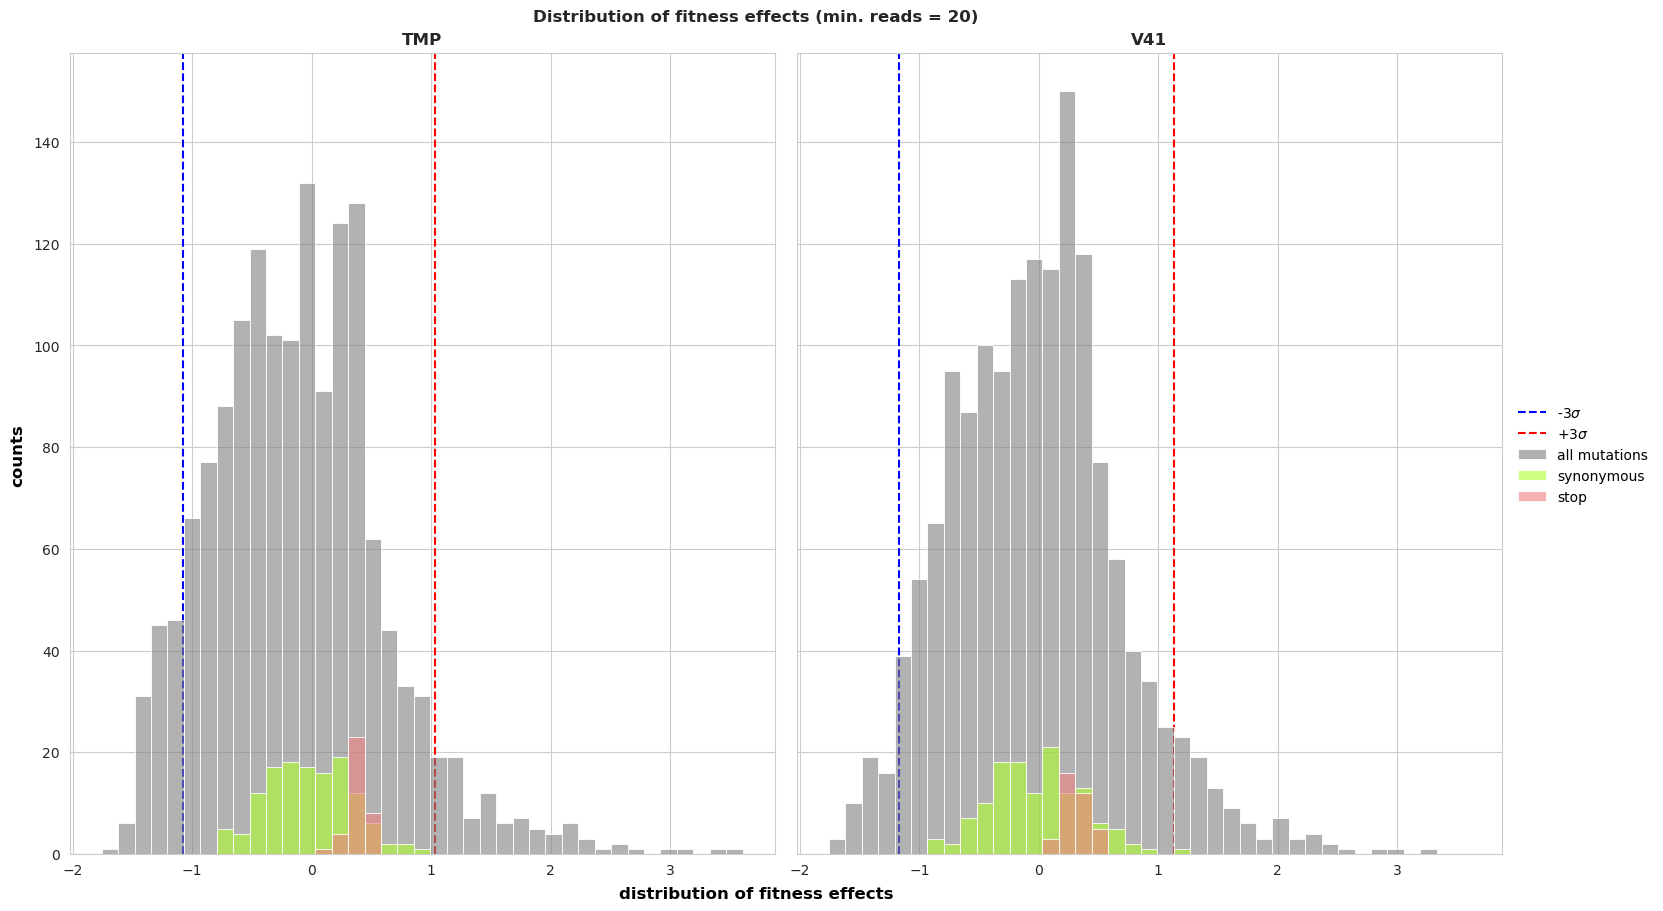

In [55]:
read_threshold = 20

fig_hist_dfe = histogram_fitness_draw(
    datasets, read_threshold=read_threshold, gaussian=True, sigma_cutoff=3
)
fig_hist_dfe.set_size_inches(15, 9)
# fig_hist_dfe.axes[-1].set_xlim(-0.5, 1.25)

<Axes: ylabel='Count'>

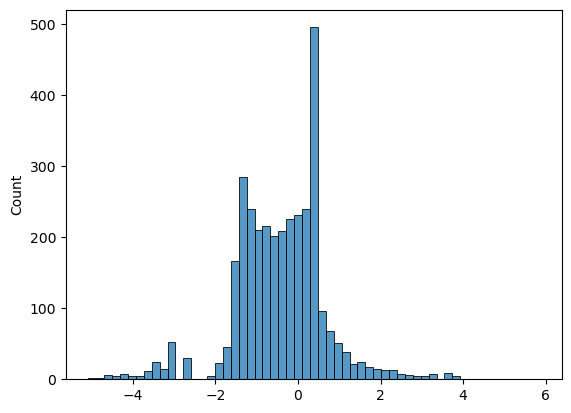

In [62]:
plt.close("all")
sns.histplot(datasets.fitness["TMP"].values.flatten())

In [33]:
from visualization.shish_kabob import shish_kabob_draw

shish_kabob_draw(datasets)

ImportError: cannot import name 'gaussian_significance' from 'fitness_analysis' (/endosome/work/greencenter/s426833/TEM-1/src/fitness_analysis.py)

In [15]:
from pymol import cmd

# cmd.fetch("1fqg")
cmd.hide("everything", "all")
cmd.show("cartoon", "1fqg")

1

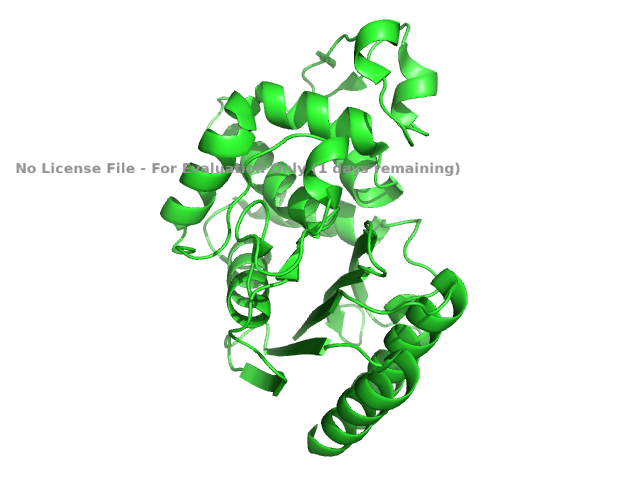

In [16]:
cmd.ipython_image()